DATA DICTONARY:------>>>

1 Age: Age of the patient [years]

2 Sex: Sex of the patient [M: Male, F: Female]

3 ChestPainType: [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

4 RestingBP: Resting blood pressure [mm Hg]

5 Cholesterol: Serum cholesterol [mm/dl]

6 FastingBS: Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

7 RestingECG: Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

8 MaxHR: Maximum heart rate achieved [Numeric value between 60 and 202] 9 ExerciseAngina: Exercise-induced angina [Y: Yes, N: No]

10 Oldpeak: ST [Numeric value measured in depression]

11 ST_Slope: The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

12 HeartDisease: Output class [1: heart disease, 0: Normal]

# 📩Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In [2]:
df = pd.read_csv('heart failure prediction.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.shape

(918, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
df.corr()['HeartDisease'].sort_values(ascending=False)

HeartDisease    1.000000
Oldpeak         0.403951
Age             0.282039
FastingBS       0.267291
RestingBP       0.107589
Cholesterol    -0.232741
MaxHR          -0.400421
Name: HeartDisease, dtype: float64

<AxesSubplot:>

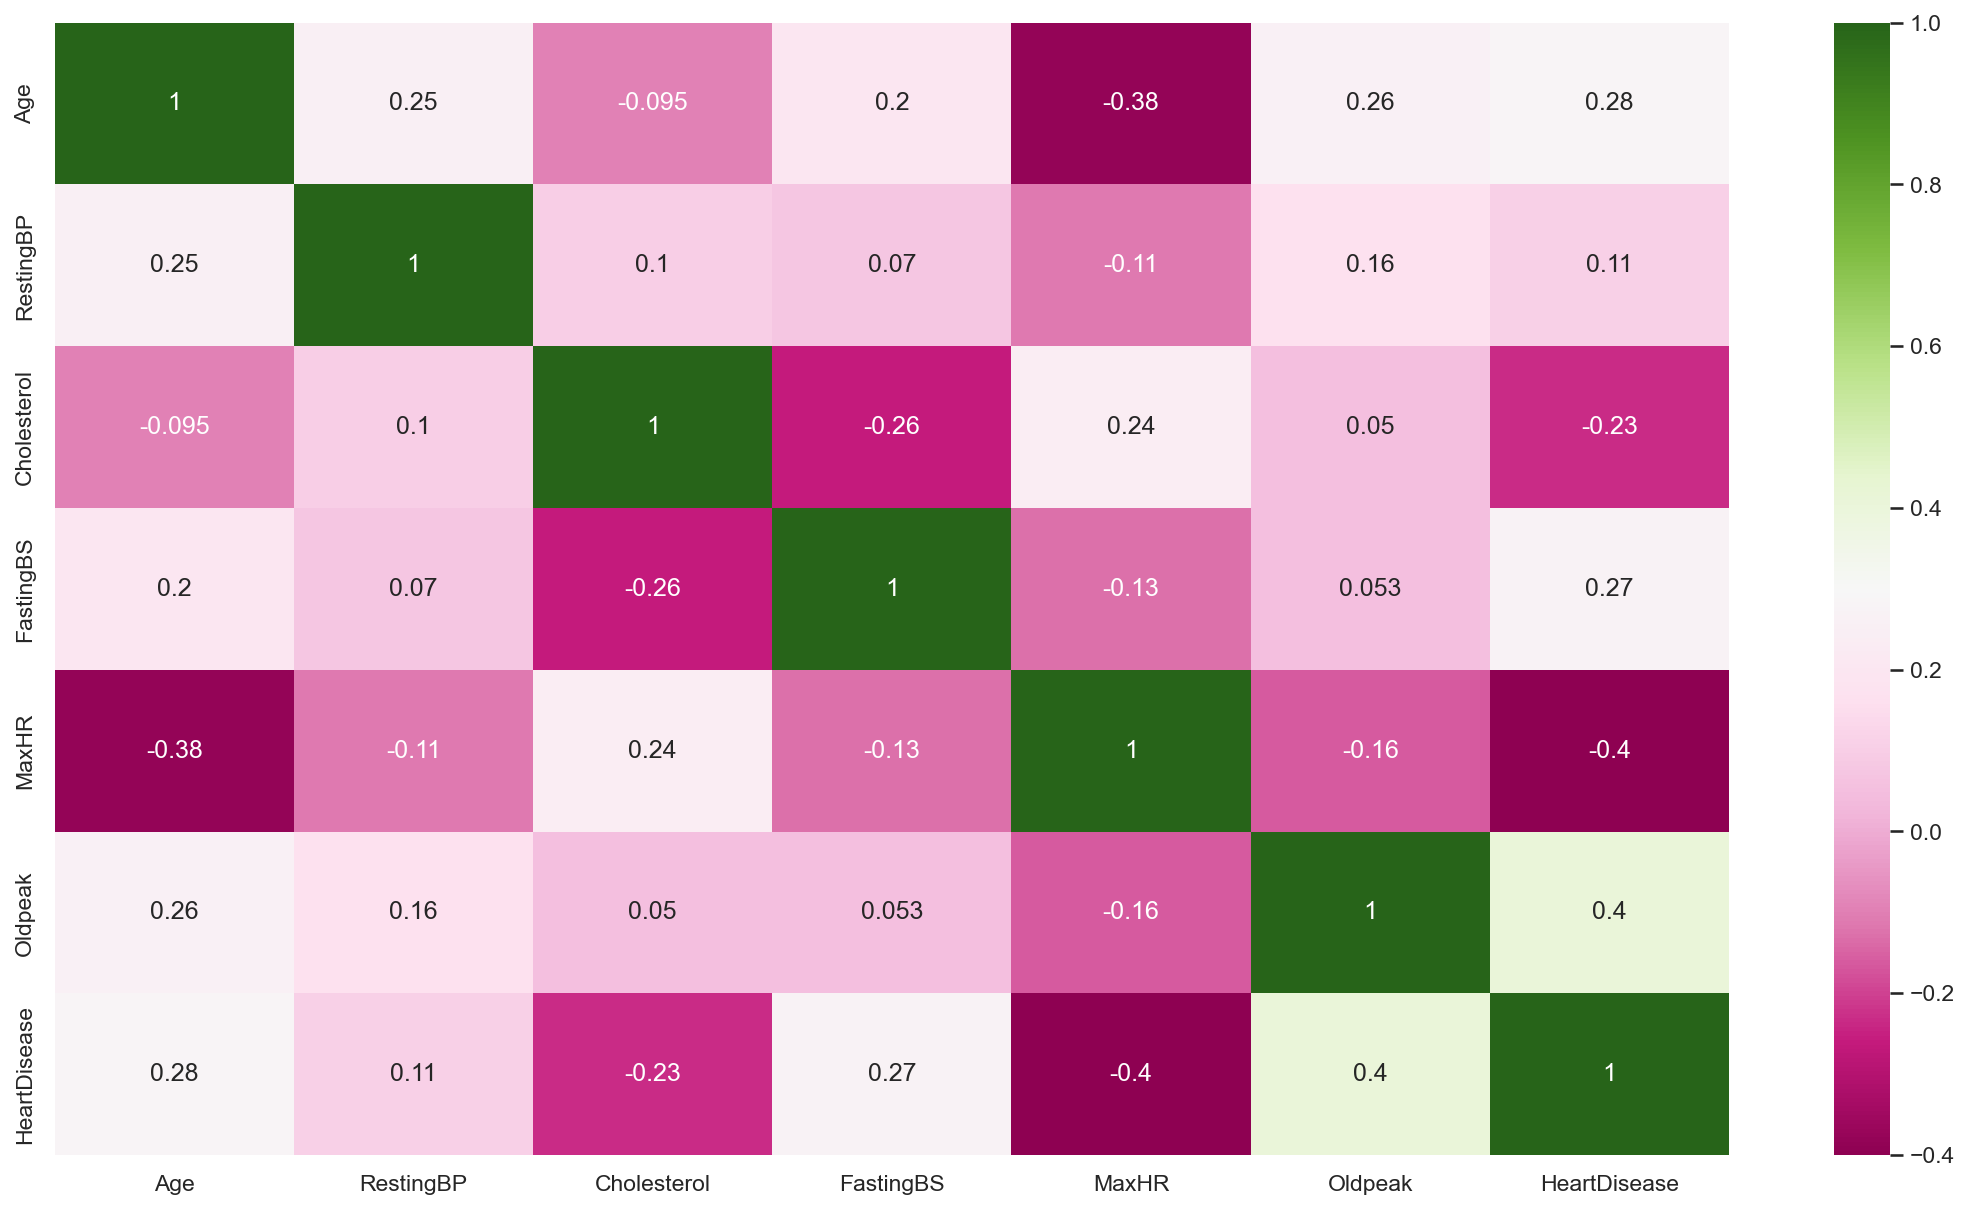

In [8]:
plt.figure(figsize=(18,10),dpi=150)
sns.heatmap(df.corr(),annot=True,cmap='PiYG')

Now we will perform EDA in 3 parts

1.Analysis the numerical Columns
2.Analysis of the categorical columns
3.Analysis of the target column

In [9]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [10]:
num_col =[]
for col in df:
    if df[col].dtype !='object':
        num_col.append(col)
num_col.remove('HeartDisease')

In [11]:
cat_col = []
for col in df:
    if df[col].dtype == 'object':
        cat_col.append(col)

In [12]:
print('Numerical Column: ',num_col)
print('Categorical Column',cat_col)

Numerical Column:  ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
Categorical Column ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


# 👁️Numerical EDA

In [13]:
df[num_col].iplot(kind='histogram',subplots=True)


In [14]:
fig = px.histogram(df,'Age',
                   color='HeartDisease',
                   title="<b> Age vs HeartDisease </b>")

fig.show()

50 to 65 age peoples are suffer in herat diseas

In [15]:
fig = px.histogram(df, x='Cholesterol',        
                   color="HeartDisease",
                   title="<b>Cholesterol vsHeartDisease</b>")

fig.show()

In [16]:
fig = px.histogram(df, 'RestingBP',             
                   color="HeartDisease",histfunc="count",
                   title="<b>RestingBP vs HeartDisease</b>")

fig.show()

# 📋Target EDA

In [17]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [18]:
fig = px.pie(df,names='HeartDisease',
            title='<b>Counts in HeartDisease</b>',
            hole = 0.4,template='plotly_dark',
            width=600,height=400)
fig.show()

# 🕸️Categorical EDA

In [19]:
df.groupby('Sex')['HeartDisease'].mean().sort_values(ascending=False)*100

Sex
M    63.172414
F    25.906736
Name: HeartDisease, dtype: float64

In [20]:
fig = px.histogram(df,"Sex",
                 color="HeartDisease", title="<b>Sex vs HeartDisease</b>",
                 template='plotly_dark',
                 width=500,height=300)

fig.show()

BOOM!! Male suffers 2xtimes more from Heart Disease comparing to Females

In [21]:
fig = px.histogram(data_frame = df,
             x = "ChestPainType",
             color="HeartDisease", title="<b>ChestPainType vs HeartDisease</b>",
             pattern_shape_sequence=["x"],template='plotly_dark', width=500,height=300)

fig.show()

Asymptomatic chest pain has almost 6 times more likely have a heart disease than person with ATA Atypical Angina chest pain

In [22]:
fig = px.histogram(data_frame = df,
             x = "RestingECG",
             color="HeartDisease", title="<b>RestingECG vs HeartDisease</b>",
             pattern_shape_sequence=['x'],template='plotly_dark', width=500,height=300)

fig.show()

RestingECG: resting electrocardiogram results don't differ much

In [23]:
fig = px.histogram(data_frame = df,
             x = "ExerciseAngina",
             color="HeartDisease", title="<b>ExerciseAngina vs HeartDisease</b>",
             pattern_shape_sequence=['x'],template='plotly_dark', width=500,height=300)

fig.show()


exercise-induced angina with 'Yes' almost 2.4 times more likley have a heart disaese than exercise-induced angina with 'No' 😯😯

In [24]:
fig = px.histogram(data_frame = df,
             x = "ST_Slope",
             color="HeartDisease", title="<b>ST_Slope vs HeartDisease</b>",
             pattern_shape_sequence=['x'],template='plotly_dark', width=500,height=300)

fig.show()

ST_Slope Up significantly less likely has heart disease than the other two segment.

♥Thank you so much and Plz do upvote if you like the Notebook